<div align="center">
    <img src="https://www.universidades.com.ec/logos/original/logo-universidad-politecnica-salesiana.png">
    <h1 style="text-align: center;"><span style="text-align: center; color: #0000ff;"><strong>PRUEBA DE SIMULACION</strong></span></h1>
    <p style="text-align: center;"><span style="text-align: center;"><strong>ESTUDIANTE: ANGEL RUIZ</strong></span></p>
</div>

<h2>
	<span style="color: #00ff00;">
		 Importaci&oacute;n de librerias
	</span>
</h2>
<p>
	<span>
	</span>
	 A continuaci&oacute;n se importaran todas las librer&iacute;as que se utilizaran en el proceso del
	<span class="misspelling correction" data-type="misspelling" data-suggestions="[{&quot;value&quot;:&quot;an&aacute;lisis&quot;},{&quot;value&quot;:&quot;ana lisis&quot;}]" data-rule="MORFOLOGIK_RULE_ES" title="Se ha encontrado un posible error ortogr&aacute;fico." data-word="analisis">
		 an&aacute;lisis
	</span>
	 y simulaci&oacute;n de los datos.
</p>

In [1]:
import simpy
import random
import numpy
import pandas as pd
import matplotlib.pyplot as pp

<h2><span style="color: #00ff00;">Variables</span></h2>
<p>Declaramos todas las variables que utilizaremos en nuestra simulación </p>

In [2]:
tiempo_simulacion = 367200 
estudiantes=200
docentes=30
cursos=40
dias=0

<h2><span style="color: #00ff00;">Logíca</span></h2>
<p>Para poder realizar una simulacion real, asignamos los estudiantes de forma aleatoria a los cursos</p>

In [3]:
estudiantesCursos = {}
def estudiantesCursosList():
    for i in range(estudiantes):
        estudiantesCursos[i+1] = 'estudiante_{}'.format(i+1),random.randint(1,cursos)
    return estudiantesCursos

<h2><span style="color: #00ff00;">Simulación</span></h2>
<p>Creamos toda nuestra lógica de simulación, el cual definimos cada cuanto los estudiantes salen a los recesos y vuelven a su casa, y así observar como se propaga virus y se retoma con normalidad las clases</p>

In [4]:
class simulacionDeClases():
    def __init__(self,entorno):
        self.env = entorno

    def llegarCurso(self,tiempo):
        yield self.env.timeout(tiempo)

    def primeraHora(self,tiempo):
        yield self.env.timeout(tiempo)

    def receso(self,tiempo):
        yield self.env.timeout(tiempo)

    def segundaHora(self,tiempo):
        yield self.env.timeout(tiempo)

    def irCasa(self,tiempo):
        yield self.env.timeout(tiempo)
        
    def pruebaPcr(self,listado):
        estudiantes_pcr = []
        for i in range(int(len(listado.keys()))):
            if((random.randint(1,100))<=14):
                estudiantes_pcr.append(i)
        return estudiantes_pcr

    def clases(self,persona):
        tiempo_llegada = random.uniform(0.016,0.032)
        yield self.env.process(self.llegarCurso(tiempo_llegada))            
        tiempo_primera_hora = 3 
        yield self.env.process(self.primeraHora(tiempo_primera_hora))
        tiempo_receso = 0.5
        yield self.env.process(self.receso(tiempo_receso))
        tiempo_segunda_hora = 2.5 
        yield self.env.process(self.segundaHora(tiempo_segunda_hora))
        tiempo_en_casa = 18
        yield self.env.process(self.irCasa(tiempo_en_casa))   

<h2><span style="color: #00ff00;">Ejecución de Simulación</span></h2>
<p>Ejecutamos nuestra simulación, para ello definimos los días que simulamos en este caso son 30 y al día 31 realizamos la prueba PCR</p>

In [5]:
cerrarCursos = []
contagiadosNuevo = []
contagiosEstudiantes = []
class Simulacion():
    def ejecutar_simulacion(self,env,listadoEstudiantes):
        proceso = simulacionDeClases(env)
        if dias < 31:
            print('Numero de estudiantes que entran a clases: {}'.format(len(listadoEstudiantes)))
            for i in listadoEstudiantes.items():
                yield env.process(proceso.clases(i))
        else:
            contagiadosNuevo = proceso.pruebaPcr(listadoEstudiantes)
            contagiosEstudiantes.append(len(contagiadosNuevo))
            for i in range(len(contagiadosNuevo)):
                for j in range(int(len(listadoEstudiantes.keys()))):
                    if(contagiadosNuevo[i]==j):
                        cerrarCursos.append(listadoEstudiantes.get(j)[1])

<h2><span style="color: #00ff00;">Resultados</span></h2>
<p>Procedemos a visualizar los resultados de nuestro modelo.</p>

In [6]:
for i in range(32):
    print('DÍA: {}'.format(i))
    env = simpy.Environment()
    simulacion = Simulacion()
    env.process(simulacion.ejecutar_simulacion(env,estudiantesCursosList()))
    env.run(until=tiempo_simulacion)
    dias+=1

DÍA: 0
Numero de estudiantes que entran a clases: 200
DÍA: 1
Numero de estudiantes que entran a clases: 200
DÍA: 2
Numero de estudiantes que entran a clases: 200
DÍA: 3
Numero de estudiantes que entran a clases: 200
DÍA: 4
Numero de estudiantes que entran a clases: 200
DÍA: 5
Numero de estudiantes que entran a clases: 200
DÍA: 6
Numero de estudiantes que entran a clases: 200
DÍA: 7
Numero de estudiantes que entran a clases: 200
DÍA: 8
Numero de estudiantes que entran a clases: 200
DÍA: 9
Numero de estudiantes que entran a clases: 200
DÍA: 10
Numero de estudiantes que entran a clases: 200
DÍA: 11
Numero de estudiantes que entran a clases: 200
DÍA: 12
Numero de estudiantes que entran a clases: 200
DÍA: 13
Numero de estudiantes que entran a clases: 200
DÍA: 14
Numero de estudiantes que entran a clases: 200
DÍA: 15
Numero de estudiantes que entran a clases: 200
DÍA: 16
Numero de estudiantes que entran a clases: 200
DÍA: 17
Numero de estudiantes que entran a clases: 200
DÍA: 18
Numero de es

<h2><span style="color: #00ff00;">Resultados</span></h2>

In [7]:
print('Total de estudiantes y docentes: {}'.format(estudiantes+docentes))
print('Total de estudiantes contagiados: {}'.format(contagiosEstudiantes))
print('Total de cursos cerrados:')
print(set(cerrarCursos))

Total de estudiantes y docentes: 230
Total de estudiantes contagiados: [30]
Total de cursos cerrados:
{1, 4, 7, 8, 10, 12, 14, 15, 16, 17, 19, 21, 23, 29, 30, 33, 34, 35, 36, 37, 38, 39}


<h2><span style="color: #00ff00;">Gráfica</span></h2>

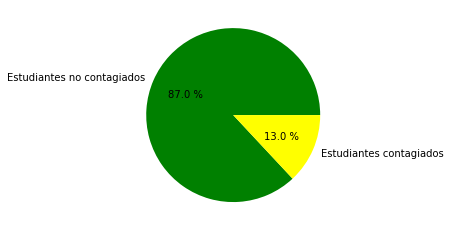

In [8]:
totalEstudiantes=int(len(estudiantesCursos.keys()))
etiquetas = ['Estudiantes no contagiados', 'Estudiantes contagiados']
pp.pie([totalEstudiantes, contagiosEstudiantes[0]], labels=etiquetas, autopct="%0.1f %%", colors=['green','yellow'])
pp.show()

<h2><span style="color: #00ff00;">Opinión</span></h2>
<p>Lo idea a la hora de realizar una simulación es tener fuentes confiables, es lo primoridal, ya que las simulaciones se basan en asemejarse a la realidad para obtener resultados que sirvan para el análisis.</p>

<h2><span style="color: #00ff00;">Conclusiones</span></h2>
<p>Aún no estamos preparados para entrar a clases presenciales, ya que observamos un porcentaje alto de estudiantes contagiados y con el sistema sanitario que poseemos colapsaría rápidamente, ya que podemos observar que estamos simulando un solo colegio, pero si abrieran todos presenciales se desbordaría rápidamente todo el sistema. Pero sin embargo considero que al ritmo de vacunación que poseemos actualmente en poco meses se podría tomar las clases presenciales.</p>